In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [26]:
df = pd.read_csv('data.csv')
df

,status,price,bed,bath,acre_lot,house_size,sold_date,address
0,for_sale,105000.0,3.0,2.0,0.12,920.0,NaN,"city_0, state_0"
1,for_sale,80000.0,4.0,2.0,0.08,1527.0,NaN,"city_0, state_0"
2,for_sale,67000.0,2.0,1.0,0.15,748.0,NaN,"city_1, state_0"
3,for_sale,145000.0,4.0,2.0,0.10,1800.0,NaN,"city_2, state_0"
4,for_sale,65000.0,6.0,2.0,0.05,NaN,NaN,"city_3, state_0"
...,...,...,...,...,...,...,...,...
402154,for_sale,299900.0,4.0,3.0,0.29,2374.0,2017-06-27,"city_1401, state_3"
402155,for_sale,275000.0,3.0,2.0,0.53,1548.0,2002-06-17,"city_230, state_3"
402156,for_sale,99900.0,2.0,1.0,0.11,569.0,NaN,"city_1287, state_3"
402157,for_sale,259700.0,3.0,2.0,0.83,1656.0,NaN,"city_199, state_3"


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402159 entries, 0 to 402158
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   status      402159 non-null  object 
 1   price       402159 non-null  float64
 2   bed         314887 non-null  float64
 3   bath        316400 non-null  float64
 4   acre_lot    326858 non-null  float64
 5   house_size  318977 non-null  float64
 6   sold_date   137227 non-null  object 
 7   address     402159 non-null  object 
dtypes: float64(5), object(3)
memory usage: 24.5+ MB


In [28]:
df=df.fillna(0)
df = df[df.house_size != 0]
df.head()

,status,price,bed,bath,acre_lot,house_size,sold_date,address
0,for_sale,105000.0,3.0,2.0,0.12,920.0,0,"city_0, state_0"
1,for_sale,80000.0,4.0,2.0,0.08,1527.0,0,"city_0, state_0"
2,for_sale,67000.0,2.0,1.0,0.15,748.0,0,"city_1, state_0"
3,for_sale,145000.0,4.0,2.0,0.10,1800.0,0,"city_2, state_0"
5,for_sale,179000.0,4.0,3.0,0.46,2520.0,0,"city_4, state_0"


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318977 entries, 0 to 402158
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   status      318977 non-null  object 
 1   price       318977 non-null  float64
 2   bed         318977 non-null  float64
 3   bath        318977 non-null  float64
 4   acre_lot    318977 non-null  float64
 5   house_size  318977 non-null  float64
 6   sold_date   318977 non-null  object 
 7   address     318977 non-null  object 
dtypes: float64(5), object(3)
memory usage: 21.9+ MB


<AxesSubplot:>

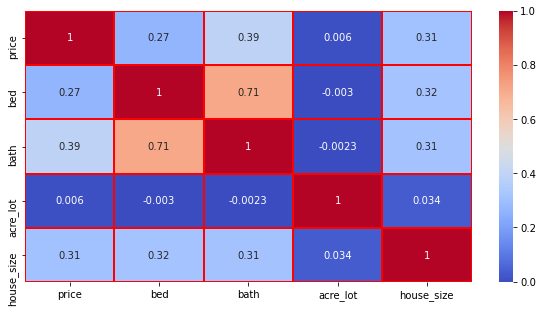

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

In [31]:
choose_features = [
        'bed',
        'bath',
        'acre_lot',
        'house_size',
    ]
x=df[choose_features]
X=x.values / 10**6
y=df['price'].values / 10**6

In [32]:
import time
train_split_percent = 0.7
X.shape,y.shape

((318977, 4), (318977,))

In [33]:
size = X.shape[0]
X_train = X[:int(train_split_percent * size),:]
X_test = X[int(train_split_percent * size):,:]
y_train = y[:int(train_split_percent * size)]
y_test = y[int(train_split_percent * size):]
y_test

array([0.889 , 0.2999, 0.295 , ..., 0.0999, 0.2597, 0.3999])

In [34]:
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)
X_train = (X_train - mu ) / sigma
X_test = (X_test - mu ) / sigma
X_train[0],X_test[0]

(array([-0.18533862, -0.21128157, -0.01038047, -0.34194444]),
 array([-0.57851471, -0.58540294, -0.01038047, -0.31576051]))

In [35]:
mu_y = np.mean(y_train, 0)
sigma_y = np.std(y_train, 0, ddof = 0)
y_train = (y_train - mu_y ) / sigma_y
y_train[0]

-0.5564698026888082

In [36]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
y_pred = np.zeros(y_test.shape)
y_train.shape, y_test.shape,y_pred.shape

((223283, 1), (95694, 1), (95694, 1))

In [37]:
X_train

array([[-0.18533862, -0.21128157, -0.01038047, -0.34194444],
       [ 0.20783747, -0.21128157, -0.0105027 , -0.18300802],
       [-0.57851471, -0.58540294, -0.0102888 , -0.38698079],
       ...,
       [-1.3648669 , -0.95952431, -0.01025824, -0.37336515],
       [ 4.13959839,  5.0264176 ,  0.28428093,  3.1389465 ],
       [-0.9716908 , -0.58540294, -0.01056381, -0.38488608]])

In [38]:
theta=np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), y_train)
theta

array([[-0.056565  ],
       [ 0.36077829],
       [ 0.00092601],
       [ 0.20789677]])

In [39]:
# Tính định thức của X^T . X
print(np.linalg.det(X_train.T.dot(X_train)))

1.0390487562971764e+21


In [40]:
def loss_multivariate(X, y, theta):
    theta = theta.reshape(-1, 1)
    m = len(X)
    # Tính hàm giả thuyết
    h = X @ theta
    loss = 1/(2*m) * np.sum((y - h) ** 2)
    return loss
loss_multivariate(X_train, y_train, theta)

0.4096965541824052

In [41]:
def covariance(x, y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov
covariance(X_train,y_train)

array([0.27010377, 0.37610927, 0.00905557, 0.28949788])

In [42]:
def correlation(x, y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    denominator = (std_deviation_x*std_deviation_y)**0.5 
    cor = numerator/denominator
    return cor
correlation(X_train,y_train)

array([0.27010256, 0.37610759, 0.00905553, 0.28949659])

In [43]:
#Kiểm tra lại bằng thư viện sklearn 
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_train,y_train)
LR.intercept_
LR.coef_

array([[-0.056565  ,  0.36077829,  0.00092601,  0.20789677]])

In [44]:
y_predict = LR.predict(X_test)
y_predict

array([[-0.24413219],
       [-0.09089638],
       [-0.22555472],
       ...,
       [-0.26868264],
       [-0.09677432],
       [-0.09560331]])

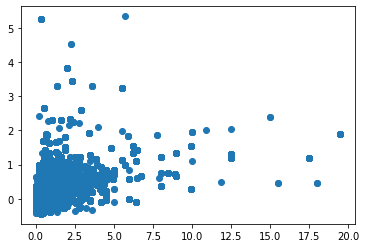

In [45]:
plt.scatter(y_test,y_predict)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

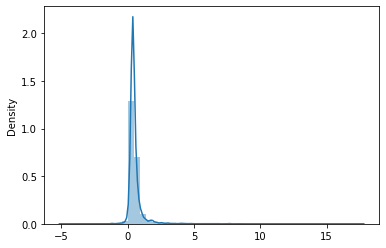

In [46]:
sns.distplot(y_test - y_predict)

In [47]:
MAE = sum(abs(y_test - y_predict))/len(y_test)
MAE

array([0.54559685])

In [48]:
MSE = sum(pow(y_test - y_predict,2))/len(y_test)
MSE

array([0.68152875])

In [49]:
RMSE = math.sqrt(MSE)
RMSE

0.8255475475987137

In [ ]:
#RMSE cho thấy giá trị chênh lệch trung bình của giá dự đoán  là 0.8255475475987137

In [50]:
coeff_df = pd.DataFrame(theta,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bed,-0.056565
bath,0.360778
acre_lot,0.000926
house_size,0.207897


In [94]:
import random
# Chọn 1 điểm dữ liệu trong tập dữ liệu và dự đoán
i = random.randint(1, len(y_test))
x_1 = X_test[i]
y_1 = y_test[i][0]
hypothesis = x_1.dot(theta)[0]
print('Dữ liệu cần dự đoán:\n', x_1)
print()
print('Dự đoán của phương pháp đầu tiên: {:.3f} '.format(hypothesis))
print('Giá trị thực tế:  {:.3f} '.format(y_1))

Dữ liệu cần dự đoán:
 [ 0.20783747  0.1628398  -0.00885262  0.0966363 ]

Dự đoán của phương pháp đầu tiên: 0.067 
Giá trị thực tế:  0.640 


In [52]:
###
def dL(X, y, theta):
    theta = theta.reshape(-1, 1)
    m = len(X)
    return -(1/m) * np.sum(X * (y - X @ theta), axis=0)

def gradient_descent():
    m, n = X_train.shape
    # Khởi tạo theta ngẫu nhiên
    theta = np.random.randn(n)
    # Chọn các tham số như số lần lặp và hệ số alpha
    iterations = 10001
    alpha = 1
    for i in range(iterations):
        # Cập nhật theta theo công thức của GD
        theta = theta - alpha * dL(X_train, y_train, theta)
        # Tính hàm mất mát
        loss = loss_multivariate(X_train, y_train, theta)
        if i % 1000 == 0:
            # Xuất giá trị mất mát ra để theo dõi
            print('Iter {}. Loss = {}'.format(i, loss))
    return theta

theta_gd = gradient_descent()

Iter 0. Loss = 0.665987600249239
Iter 1000. Loss = 0.4096965541824052
Iter 2000. Loss = 0.4096965541824052
Iter 3000. Loss = 0.4096965541824052
Iter 4000. Loss = 0.4096965541824052
Iter 5000. Loss = 0.4096965541824052
Iter 6000. Loss = 0.4096965541824052
Iter 7000. Loss = 0.4096965541824052
Iter 8000. Loss = 0.4096965541824052
Iter 9000. Loss = 0.4096965541824052
Iter 10000. Loss = 0.4096965541824052


In [53]:
loss_multivariate(X_train, y_train, theta_gd)

0.4096965541824052

In [54]:
coeff_df2 = pd.DataFrame(theta_gd,x.columns,columns=['Coefficient'])
coeff_df2

,Coefficient
bed,-0.056565
bath,0.360778
acre_lot,0.000926
house_size,0.207897


In [113]:
import random
# Chọn 1 điểm dữ liệu trong tập dữ liệu và dự đoán
j = random.randint(1, len(y_test))
x_2 = X_test[j]
y_2 = y_test[j][0]
hypothesis2 = x_2.dot(theta_gd)
print('Dữ liệu cần dự đoán:\n', x_2)
print()
print('Dự đoán của phương pháp đầu tiên: {:.3f} '.format(hypothesis2))
print('Giá trị thực tế: {:.3f} '.format(y_2))

Dữ liệu cần dự đoán:
 [ 0.60101356  0.53696117 -0.00900541  0.45352319]

Dự đoán của phương pháp đầu tiên: 0.254 
Giá trị thực tế: 0.645 


In [96]:
# Ta thấy giữa Linear và gradient descent khi train không có khác biệt quá lớn về loss
#--> MODLE lINEAR thích hợp với data đã cho

In [ ]:
###KNN
import time

start = time.process_time()
n_neigh = 10
for row in range(len(X_test)):
    euclidian_distance = np.sqrt(np.sum((X_train - X_test[row])**2, axis = 1 ))
    y_pred[row] = y_train[np.argsort(euclidian_distance, axis = 0)[:n_neigh]].mean()* sigma_y + mu_y
    
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
print(RMSE)
print(time.process_time() - start)


In [ ]:
#Vì dữ liệu khá lớn, không thể chạy hết ->> Chọn Model Linear là model thích hợp cho dataset